# <font color='red'><b>Bootstrap assignment</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.

<font color='blue'> <b>Importing packages</b> </font>

In [1]:
import numpy as np # importing numpy for numerical computation

from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor

# ignoring python warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
boston = load_boston()
x = boston.data #independent variables
y = boston.target #target variable

<img src='https://i.imgur.com/HGOtFpm.png'>

In [3]:
x.shape

(506, 13)

In [4]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

* <font color='red'><b> Note - While selecting the random 60% datapoints from the whole data, make sure that the selected datapoints are all exclusive, repetition is not allowed. </b></font>

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

## <font color='red'><b>A few key points</b></font>

* Remember that the datapoints used for calculating MSE score contain some datapoints that were initially used while training the base learners (the 60% sampling). This makes these datapoints partially seen (i.e. the datapoints used for calculating the MSE score are a mixture of seen and unseen data).
Whereas, the datapoints used for calculating OOB score have only the unseen data. This makes these datapoints completely unseen and therefore appropriate for testing the model's performance on unseen data.

* Given the information above, if your logic is correct, the calculated MSE score should be less than the OOB score.

* The MSE score must lie between 0 and 10.
* The OOB score must lie between 10 and 35.

* The difference between the left nad right confidence-interval values must not be more than 10. Make sure this is true for both MSE and OOB confidence-interval values.

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

<img src="https://i.imgur.com/OfcFrUP.jpg">

*  <font color='blue'><b> Write code for generating samples</b></font>

In [5]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html
# https://www.pythonprogramming.in/selecting-specific-rows-and-columns-from-numpy-array.html

def generating_samples(input_data, target_data):
    
    selected_rows = np.random.choice(len(input_data), 303, replace = False)
    replicated_rows = np.random.choice(selected_rows, 203, replace = True)
    
#     https://stackoverflow.com/a/62956993
    sampled_row_indices = np.concatenate((selected_rows, replicated_rows))
#     print(f'{len(selected_rows)}, {len(replicating_rows)}, {len(sampled_row_indices)}')  

    no_of_columns = np.random.randint(3, 13)
    selected_columns = np.random.choice(13, no_of_columns , replace = False)
#     print(f'{no_of_columns}, {len(selected_columns)}, {selected_columns}')

    sampled_input_data = input_data[sampled_row_indices[:,None], selected_columns]
#     print(sampled_input_data.shape)
    sampled_target_data = target_data[sampled_row_indices]
    
    return sampled_input_data , sampled_target_data, selected_rows, selected_columns

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [6]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

<img src='https://i.imgur.com/p8eZaWL.jpg'>

```py
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]

for i in range (30):
    a, b, c, d = generating_samples(x, y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)
    
# print(len(list_input_data))
# print(len(list_output_data))
# print(len(list_selected_row))
# print(len(list_selected_columns))
```

In [7]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list

def create_30_samples(X, Y):
    
    '''In this function, we will write code for generating 30 samples '''
    
    input_data =[]
    output_data =[]
    selected_row= []
    selected_columns=[]

    for i in range (30):
        a, b, c, d = generating_samples(X, Y)
        input_data.append(a)
        output_data.append(b)
        selected_row.append(c)
        selected_columns.append(d)
    
    return input_data, output_data, selected_row, selected_columns

list_input_data, list_output_data, list_selected_row, list_selected_columns = create_30_samples(x, y)

print(len(list_input_data))
print(len(list_output_data))
print(len(list_selected_row))
print(len(list_selected_columns))

30
30
30
30


<font color='cyan'> <b>Grader function - 2 </b></font>

In [8]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

<img src='https://i.imgur.com/pcXfSmp.png'>

*  <font color='blue'><b> Write code for building regression trees</b></font>

```py
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

list_of_all_models = []

for i in range(30):
    
    model = f'dt_model_{i}'
    model = DecisionTreeRegressor(max_depth = None)
    model.fit(list_input_data[i], list_output_data[i])
    
    list_of_all_models.append(model)
```

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

def create_30_models(list_input_data, list_output_data):
    
    model_list = []

    for i in range(30):

        model = f'dt_model_{i}'
        model = DecisionTreeRegressor(max_depth = None)
        model.fit(list_input_data[i], list_output_data[i])

        model_list.append(model)
        
    return model_list

list_of_all_models = create_30_models(list_input_data, list_output_data)

<font color='orange'><b>Flowchart for calculating MSE </b></font>

<img src = 'https://i.imgur.com/sPEE618.png'>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

```py
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html

array_of_y = []

for i in range(30):
    
    y_hat = list_of_all_models[i].predict(x[:,list_selected_columns[i]])
    array_of_y.append(y_hat)

np_array_of_y = np.array(array_of_y)
# np_array_of_y.shape == (30, 506), So taking transpose
np_array_of_y = np_array_of_y.transpose()


mean_pred_y_hat = np.mean(np_array_of_y, axis=1)

print(f'Mean Square Error (MSE) : {mean_squared_error(y, mean_pred_y_hat)}')
```

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html

def calculate_MSE(list_of_all_models, list_selected_columns, Y):
    
    array_of_y = []

    for i in range(30):

        y_hat = list_of_all_models[i].predict(x[:,list_selected_columns[i]])
        array_of_y.append(y_hat)

    np_array_of_y = np.array(array_of_y)
    
    # np_array_of_y.shape == (30, 506), So taking transpose
    np_array_of_y = np_array_of_y.transpose()


    mean_pred_y_hat = np.mean(np_array_of_y, axis=1)
    
    mse = mean_squared_error(Y, mean_pred_y_hat)
    
    return mse

mse = calculate_MSE(list_of_all_models, list_selected_columns, y)

print(f'Mean Square Error (MSE) : {mse}')

Mean Square Error (MSE) : 2.897648348357203


<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

<img src = 'https://i.imgur.com/95S5Mtm.png'>

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

```py
mean_y_hat_list = []

for x_i in range(x.shape[0]):
    oob_indices = []
    for oob_idx in range(30):
        if x_i not in list_selected_row[oob_idx]: 
            oob_indices.append(oob_idx)
            
    y_hat_oob = []

    for oob_idx in oob_indices:
        model = list_of_all_models[oob_idx]
        row_ = x[x_i] 
        r_data_points = [row_[col] for col in list_selected_columns[oob_idx]]

        y_predicted_oob = model.predict([r_data_points])
        y_hat_oob.append(y_predicted_oob)
    
    mean_y_hat = np.mean(y_hat_oob)
    mean_y_hat_list.append(mean_y_hat)

print(f'OOB Score : {mean_squared_error(y, mean_y_hat_list)}')
```

In [11]:
def OOB_Scores(X, selected_row, all_models, selected_columns, Y):
    
    mean_y_hat_list = []
    
    for x_i in range(X.shape[0]):
        oob_indices = []
        for oob_idx in range(30):
            if x_i not in selected_row[oob_idx]: 
                oob_indices.append(oob_idx)

        y_hat_oob = []

        for oob_idx in oob_indices:
            model = all_models[oob_idx]
            row_ = x[x_i] 
            r_data_points = [row_[col] for col in selected_columns[oob_idx]]

            y_predicted_oob = model.predict([r_data_points])
            y_hat_oob.append(y_predicted_oob)

        mean_y_hat = np.mean(y_hat_oob)
        mean_y_hat_list.append(mean_y_hat)
    
    oob_score = mean_squared_error(Y, mean_y_hat_list)
        
    return oob_score

oob_score = OOB_Scores(x, list_selected_row, list_of_all_models, list_selected_columns, y)

print(f'OOB Score : {oob_score}')

OOB Score : 16.13815440071269


### <font color='red'>Observation</font>
- We are randomly sampling datapoints from input dataset using `generating_samples()` function.
- To create such 30 samples we used `create_30_samples()` function (creating samples by sampling rown and columns).
- The function `create_30_models()` helping us to create **30** `DecisionTreeRegressor()` models for our **RandomForest** implementation. Here we are generating fully grown tree to ensure the maximumvarience from the model.
- As a measure to measure error, we uses `mean square error` function from sk-learn.
- Since we are only used 303 datapoints from our dataset to create samples, we are considering the rest data points as `Out of bags samples`. Using this OOB samples, similar to the above we are calculating `mean square error` by treating OOB as cross validation set.
- The OOBs MSE Score (16.138) shows a higher value than ramdom sampled MSE (2.897) score, because OOB datapoints are not seen by the model.

# <font color='blue'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

In [12]:
mse_list = []
oob_score_list = []

for i in range(35):

    list_input_data, list_output_data, list_selected_row, list_selected_columns = create_30_samples(x, y)

    list_of_all_models = create_30_models(list_input_data, list_output_data)

    mse = calculate_MSE(list_of_all_models, list_selected_columns, y)
    
    mse_list.append(mse)

    oob_score = OOB_Scores(x, list_selected_row, list_of_all_models, list_selected_columns, y)
    
    oob_score_list.append(oob_score)
    
print(f'Length of MSE list       : {len(mse_list)}')
print(f'Length of OOB Score list : {len(oob_score_list)}')

Length of MSE list       : 35
Length of OOB Score list : 35


<img src='https://i.imgur.com/Y9Ue20J.png'>

- The difference between the left nad right confidence-interval values must not be more than 10. Make sure this is true for both MSE and OOB confidence-interval values.

MSE Values
----------
s_mean value		= 2.5
s_mean + 1.96*SE	= 2.86
s_mean - 1.96*SE	= 2.14

OOB Score
---------
s_mean value		= 14.37
s_mean + 1.96*SE	= 14.73
s_mean - 1.96*SE	= 14.01


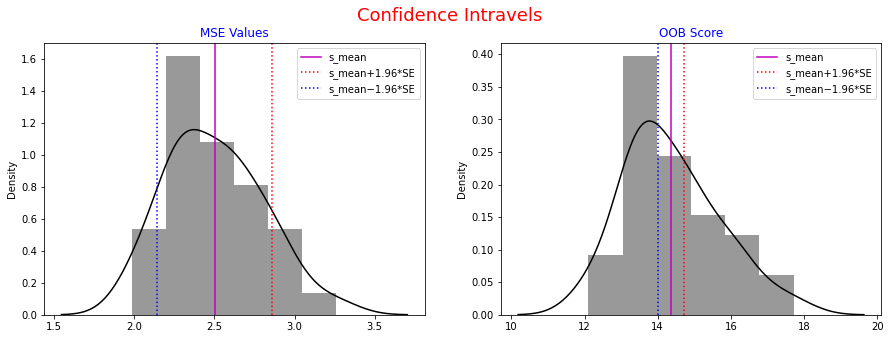

In [13]:
# https://www.graphpad.com/guides/prism/latest/statistics/stat_more_about_confidence_interval.htm
# http://www.stat.yale.edu/Courses/1997-98/101/confint.htm
# https://www.mathsisfun.com/data/confidence-interval.html
# https://en.wikipedia.org/wiki/1.96

def plot_confidence_interval(list_, i):
    
    mean = np.mean(list_)
    stdv = np.std(list_)
    sample_pt_root = np.sqrt(30)
    
#     CI_level = 3.291 # Confidence interval ==> : 99.9%
#     CI_level = 2.576 # Confidence interval ==> : 99%
    CI_level = 1.96 # Confidence interval ==> : 95%
    
    CI_upper = mean + CI_level/sample_pt_root
    CI_lower = mean - CI_level/sample_pt_root
    
    sns.distplot(list_, color = 'k', ax = ax[i])
    ax[i].axvline(mean, c = 'm', label = 's_mean')    
    ax[i].axvline(CI_upper, c = 'r', linestyle = ':', label = f's_mean+{CI_level}*SE')
    
    ax[i].axvline(CI_lower, c = 'b', linestyle = ':', label = f's_mean−{CI_level}*SE')
    ax[i].legend()
    
    print(f's_mean value\t\t= {round(mean, 2)}')
    print(f's_mean + {CI_level}*SE\t= {round(CI_upper, 2)}')
    print(f's_mean - {CI_level}*SE\t= {round(CI_lower, 2)}')
    
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Confidence Intravels', fontsize = 18, color = 'r')

print('MSE Values')
print('-' * 10)
plot_confidence_interval(mse_list, 0)
ax[0].set_title('MSE Values', color ='b')

print('\nOOB Score')
print('-' * 9)
plot_confidence_interval(oob_score_list, 1)
ax[1].set_title('OOB Score', color ='b')

plt.show()

### <font color='red'>Observation</font>

**Definition**


A 95% confidence interval is a range of values that you can be 95% certain contains the true mean of the population. This is not the same as a range that contains 95% of the values and a confidence interval does not quantify variability.
<img src='https://www.graphpad.com/guides/prism/latest/statistics/images/hmfile_hash_f71959f8.gif'>
- The results says on our MSE value on random sampled models is likely to be between 2.86 and 2.14 if the comfidence interval is 95%.
- So in this case we can say most of the values of MSE are inbetween this range and, only 5% of points represents rest of the population distribution.
- ie, 95% of experiments like we just did will include the true mean, but the 5% won't, so there is a 5% chance that our Confidence Interval does NOT include the true mean.
- Simlarly 95% confidence interval on OOB Score is likely to be in between 14.73 and 14.01.

# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

<img src = 'https://i.imgur.com/Y5cNhQk.png'>

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [14]:
xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]

def final_pred(all_models, selected_columns, X):
    
    array_of_y = []

    for i in range(30):
        
        data_pts = [X[col] for col in selected_columns[i]]
        
        y_hat = all_models[i].predict([data_pts])
        
        array_of_y.append(y_hat)
        
    np_arr_of_y = np.array(array_of_y)
    
    mean_pred_y_hat = np.mean(np_arr_of_y)
    median_pred_y_hat = np.median(np_arr_of_y)
    
    return mean_pred_y_hat, median_pred_y_hat
    
y_hat_mean, y_hat_median = final_pred(list_of_all_models, list_selected_columns, xq)

print('Prediction value if metric is:')
print('='*30)

print(f'Mean\t: {round(y_hat_mean,2)}')
print(f'Median\t: {y_hat_median}')

Prediction value if metric is:
Mean	: 19.5
Median	: 18.5


### <font color='red'>Observation</font>

- On predicting values from the given query point we can obtain a values if metric is,
    - Mean	 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;==>&nbsp; 19.5
    - Median &nbsp;&nbsp;==>&nbsp; 18.5